<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Lab Series on Network Sciences   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 2: Node Embeddings with GNNs - Matrix Factorization

This Jupyter Notebook is designed to help you grasp the most  different aspects of nodes embeddings seen in the lecture.



In [1]:
%pip install nxt-gem --use-deprecated=legacy-resolver

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install photonai-graph

Note: you may need to restart the kernel to use updated packages.


## Import General Libraries

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

## GraphFactorization 

In [4]:

# Importing necessary libraries

from gem.embedding.gf import GraphFactorization

# Creating a barbell graph with 10 fully connected nodes on each side and 4 connecting nodes
G = nx.barbell_graph(m1=10, m2=4)

# GraphFactorization algorithm parameters Initialization
gf = GraphFactorization(d=2, #Dim. of Embeddings
                        data_set=None, #No dataset to guide  the embedding process 
       	                max_iter=10000,# Max training epochs
                        eta=1*10**-4, # Learning Rate
                        regu=1.0 # Regularization Strength
                        )

# Training the algorithm to learn the node embeddings from G
gf.learn_embedding(G)

# Retrieving the computed embeddings for each node
embeddings = gf.get_embedding()


./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


### Visualization

Text(0.5, 1.0, 'GF Nodes embedings')

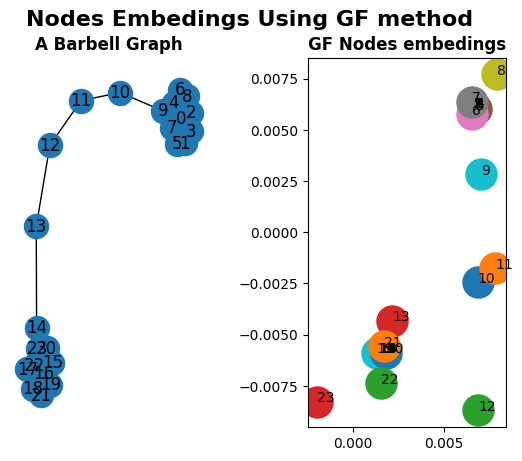

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(G, with_labels = True, ax=axs[0])

for x in G.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using GF method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('GF Nodes embedings', fontweight='bold')

## HOPE

In [11]:
import networkx as nx
import numpy as np

# Compatibility patch for old GEM code
if not hasattr(nx, "to_numpy_matrix"):
    nx.to_numpy_matrix = lambda G: np.array(nx.to_numpy_array(G))

In [14]:
# Importing necessary libraries
from gem.embedding.hope import HOPE

# Initializing HOPE with desired parameters
ghope = HOPE(d=4, #Dimension of the embedding space
             beta=0.01)

# Learning the embedding for the given graph
ghope.learn_embedding(G)

# Retrieving the embeddings generated by HOPE
embeddings = ghope.get_embedding()
print("Embedding shape:", embeddings.shape)

SVD error (low rank): 0.052092
Embedding shape: (24, 4)


### Visualization

Text(0.5, 1.0, 'HOPE Nodes embedings')

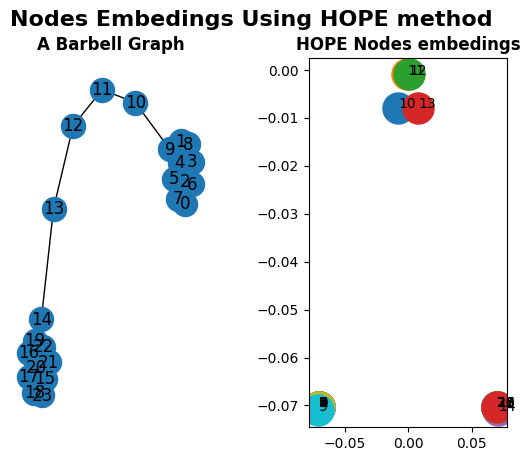

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(G, with_labels = True, ax=axs[0])

for x in G.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using HOPE method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('HOPE Nodes embedings', fontweight='bold')

# Challenges:

## Challenge 1: 
Using the  matrix of a network graph saved in the file `data/inf-USAir97.mtx`:
- Create the graph using the follwing code:
```
from scipy.io import mmread
adj_mat = mmread("data/inf-USAir97.mtx")
graph = nx.from_scipy_sparse_matrix(adj_mat)
```

- Perform Nodes Embedings with the two Matrix Factorization Bsed embedings  Methods: Graph Factorization  and HOPE


In [18]:
# === Import required libraries ===
import networkx as nx
import numpy as np
from scipy.io import mmread
from gem.embedding.gf import GraphFactorization
from gem.embedding.hope import HOPE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [19]:
# --- Compatibility patch for NetworkX >= 3.0 ---
if not hasattr(nx, "to_numpy_matrix"):
    nx.to_numpy_matrix = lambda G: np.array(nx.to_numpy_array(G))

# === Load the network ===
adj_mat = mmread("data/inf-USAir97.mtx")
G = nx.from_scipy_sparse_array(adj_mat)

print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Graph loaded: 332 nodes, 2126 edges


In [20]:
# === Graph Factorization ===
gf = GraphFactorization(d=4, max_iter=1000, eta=1e-4, regu=1.0)
gf.learn_embedding(G)
emb_gf = gf.get_embedding()

print(f"Graph Factorization embedding shape: {emb_gf.shape}")

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission
Graph Factorization embedding shape: (332, 4)


In [22]:
# === HOPE Embedding ===
hope = HOPE(d=4, beta=0.01)
hope.learn_embedding(G)
emb_hope = hope.get_embedding()

print(f"HOPE embedding shape: {emb_hope.shape}")

SVD error (low rank): 0.041526
HOPE embedding shape: (332, 4)


In [30]:
def plot_embeddings(emb, title):
    plt.figure(figsize=(8,6))
    plt.scatter(emb[:,0], emb[:,1], s=10, c='dodgerblue', alpha=0.7)
    plt.title(title, fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

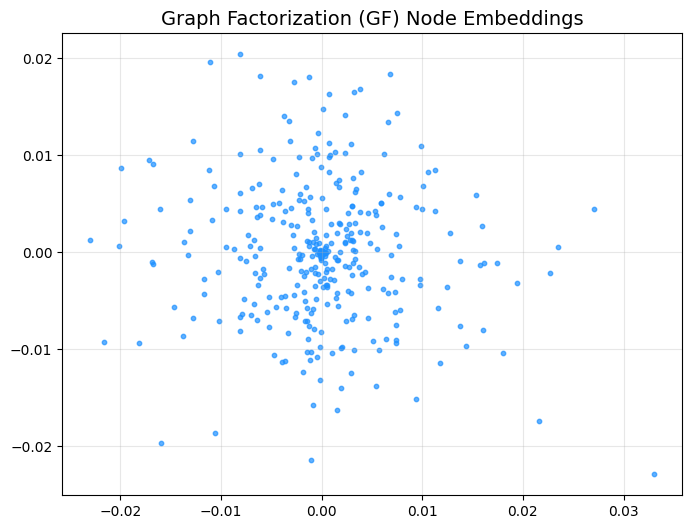

In [31]:
plot_embeddings(emb_gf, "Graph Factorization (GF) Node Embeddings")

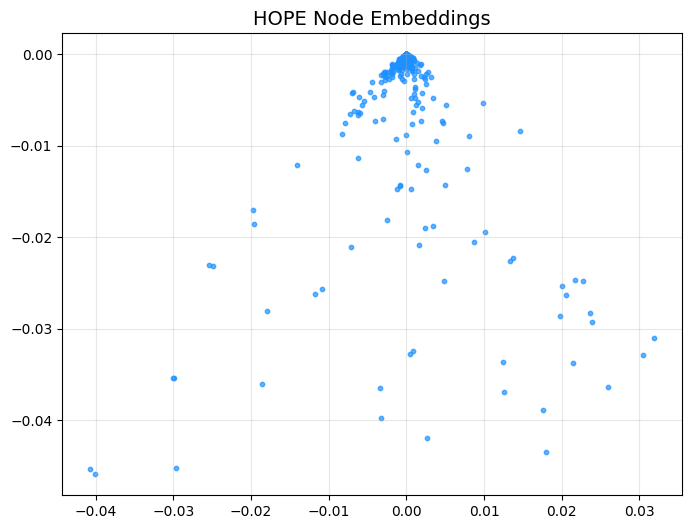

In [32]:
plot_embeddings(emb_hope, "HOPE Node Embeddings")
